In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/Complete-Deep-Learning/master/ANN/Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
X = dataset.iloc[:, 3:-1]
y = dataset.iloc[:, -1]

In [4]:
X = pd.get_dummies(X, columns=["Geography", "Gender"], drop_first=True)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [8]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, PReLU, ELU, Dropout

In [10]:
classifier = Sequential()

In [11]:
classifier.add(Dense(units=6, kernel_initializer="he_uniform", activation="relu", input_dim=11))

In [42]:
classifier.add(Dense(units=6, kernel_initializer="he_uniform", activation="relu"))

In [43]:
classifier.add(Dense(units=1, kernel_initializer="glorot_uniform", activation="sigmoid"))

In [46]:
classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [48]:
model_history = classifier.fit(x=X_train, y=y_train, validation_split=0.33, batch_size=10, epochs=100)

Epoch 1/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4975 - accuracy: 0.7946 - val_loss: 0.4609 - val_accuracy: 0.8001
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4474 - accuracy: 0.8044 - val_loss: 0.4394 - val_accuracy: 0.8031
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4297 - accuracy: 0.8095 - val_loss: 0.4319 - val_accuracy: 0.8023
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4229 - accuracy: 0.8104 - val_loss: 0.4281 - val_accuracy: 0.8027
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4177 - accuracy: 0.8145 - val_loss: 0.4237 - val_accuracy: 0.8061
Epoch 6/100
536/536 [==============================] - 1s 961us/step - loss: 0.4132 - accuracy: 0.8158 - val_loss: 0.4205 - val_accuracy: 0.8088
Epoch 7/100
536/536 [==============================] - 1s 942us/step - loss: 0.4096 - accuracy: 0.8160 - val_loss: 0.4170 - val_accuracy: 0.

In [53]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


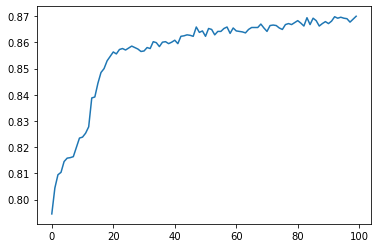

In [55]:
plt.plot(model_history.history["accuracy"])

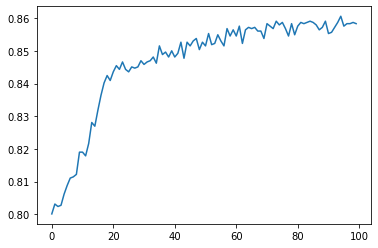

In [56]:
plt.plot(model_history.history["val_accuracy"])

In [49]:
y_pred = classifier.predict(X_test)
y_pred = y_pred>0.5

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, y_pred)

array([[1504,   91],
       [ 188,  217]], dtype=int64)

In [52]:
accuracy_score(y_pred, y_test)

0.8605